# Mid Bootcamp Classification Project

## Scenario and Objective

- We are working as a risk analysts with a bank. Apart from the other banking and loan services, the bank also provides credit card services that are a very important source of revenue for the bank. 
- The bank wants to understand the **demographics and other characteristics of its customers that accept a credit card offer** and that do not accept a credit card.

- **Build a model that will provide insight into why some bank customers accept credit card offers.** There are also other potential areas of opportunities that the bank wants to understand from the data.

## Initial Setup

### Importing Libraries

In [688]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Importing the CSV file

In [689]:
df = pd.read_excel('creditcardmarketing.xlsx')

### Normalising column header names

In [690]:
df.columns = ['customer_number', 'offer_accepted', 'reward', 'mailer_type',
       'income_level', 'no_bank_accounts_open', 'overdraft_protection',
       'credit_rating', 'no_credit_cards_held', 'no_homes_owned',
       'household_size', 'own_your_home', 'average_balance', 'q1_balance',
       'q2_balance', 'q3_balance', 'q4_balance']

In [691]:
df.columns

Index(['customer_number', 'offer_accepted', 'reward', 'mailer_type',
       'income_level', 'no_bank_accounts_open', 'overdraft_protection',
       'credit_rating', 'no_credit_cards_held', 'no_homes_owned',
       'household_size', 'own_your_home', 'average_balance', 'q1_balance',
       'q2_balance', 'q3_balance', 'q4_balance'],
      dtype='object')

## Exploratory Data Analysis

In [692]:
df.head()

,customer_number,offer_accepted,reward,mailer_type,income_level,no_bank_accounts_open,overdraft_protection,credit_rating,no_credit_cards_held,no_homes_owned,household_size,own_your_home,average_balance,q1_balance,q2_balance,q3_balance,q4_balance
0,1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
1,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
2,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
3,4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
4,5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0


In [693]:
# We can see 24 null values which we will need to address.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   customer_number        18000 non-null  int64  
 1   offer_accepted         18000 non-null  object 
 2   reward                 18000 non-null  object 
 3   mailer_type            18000 non-null  object 
 4   income_level           18000 non-null  object 
 5   no_bank_accounts_open  18000 non-null  int64  
 6   overdraft_protection   18000 non-null  object 
 7   credit_rating          18000 non-null  object 
 8   no_credit_cards_held   18000 non-null  int64  
 9   no_homes_owned         18000 non-null  int64  
 10  household_size         18000 non-null  int64  
 11  own_your_home          18000 non-null  object 
 12  average_balance        17976 non-null  float64
 13  q1_balance             17976 non-null  float64
 14  q2_balance             17976 non-null  float64
 15  q3

In [694]:
df.describe()

,customer_number,no_bank_accounts_open,no_credit_cards_held,no_homes_owned,household_size,average_balance,q1_balance,q2_balance,q3_balance,q4_balance
count,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,17976.000000,17976.000000,17976.000000,17976.000000,17976.000000
mean,9000.500000,1.255778,1.903500,1.203444,3.499056,940.515562,910.450656,999.392190,1042.033600,810.185803
std,5196.296758,0.472501,0.797009,0.427341,1.114182,350.297837,620.077060,457.402268,553.452599,559.001365
min,1.000000,1.000000,1.000000,1.000000,1.000000,48.250000,0.000000,0.000000,0.000000,0.000000
25%,4500.750000,1.000000,1.000000,1.000000,3.000000,787.500000,392.750000,663.000000,633.000000,363.000000
50%,9000.500000,1.000000,2.000000,1.000000,3.000000,1007.000000,772.000000,1032.000000,945.500000,703.000000
75%,13500.250000,1.000000,2.000000,1.000000,4.000000,1153.250000,1521.000000,1342.000000,1463.000000,1212.000000
max,18000.000000,3.000000,4.000000,3.000000,9.000000,3366.250000,3450.000000,3421.000000,3823.000000,4215.000000


In [695]:
# Looking at the number of credit card offers accepted or rejected.
# We can see that this is a highly imbalanced data set, which will need adjusting.

df['offer_accepted'].value_counts()

No     16977
Yes     1023
Name: offer_accepted, dtype: int64

## Inital Data Cleaning

### Dealing with null values

In [696]:
# We replace the null values with the average figure for that column.
# This is so that we do not have to drop these rows and lose the other data which may be useful.

df['average_balance'] = df['average_balance'].fillna(df['average_balance'].mean())
df['q1_balance'] = df['q1_balance'].fillna(df['q1_balance'].mean())
df['q2_balance'] = df['q2_balance'].fillna(df['q2_balance'].mean())
df['q3_balance'] = df['q3_balance'].fillna(df['q3_balance'].mean())
df['q4_balance'] = df['q4_balance'].fillna(df['q4_balance'].mean())

### Dropping customer_number

In [697]:
# This is simply noise in the data and will not be a helpful indicator of acceptance.

df.drop('customer_number', axis=1, inplace=True)

## Checking for multicolinearity

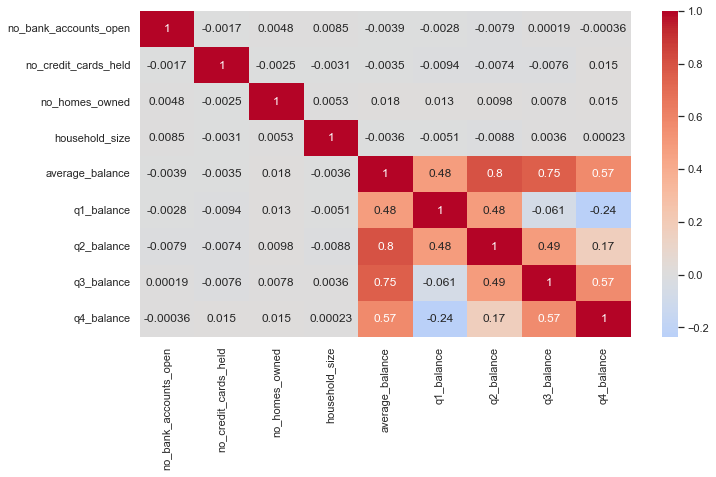

In [698]:
# q2 balance is quite highly corrrelated with average balance.
# However when we dropped average balance in other tests not shown here, 
# the accuracy decreased and so we have chosen to keep all the data.

plt.figure(figsize=(11, 6))
sns.heatmap(df.corr(), annot=True, cmap = 'coolwarm', center=0);

## Data Wrangling

### Feature Engineering

In [699]:
# This column shows the difference between whether there has been an increase or decrease
# in a customer's balance from the start to the end of the year
# In our tests it marginally improves models.

df['trend'] = df['q4_balance'] - df['q1_balance']
df['trend'] = df['trend'].apply(lambda x:'up'if x>0 else 'down')


In [700]:
# This column shows the average balance divided by the household size.
# We thought that there may be some connection between family size and balance which 
# could predict acceptance.
# Our models were very slightly improved by this addition.

df['capita'] = df['average_balance']/df['household_size']

### Changing some columns to categorical

In [701]:
# Changing these columns from numerical to categorical improved our models.

df['no_bank_accounts_open'] = df['no_bank_accounts_open'].astype('object')
df['no_credit_cards_held'] = df['no_credit_cards_held'].astype('object')
df['no_homes_owned'] = df['no_homes_owned'].astype('object')
df['household_size'] = df['household_size'].astype('object')

## Continued Exploratory Data Analysis

In [702]:
# We can see that the results where an offer has been accepted are very mixed in with where it has been 
# rejected. This suggests that our model will not have very high accuracy and that if it did,
# it would probably have been overfitted to the data.

sns.pairplot(df, kind='scatter', hue='offer_accepted')

### Chi-squared

In [703]:
from scipy.stats import chi2_contingency

In [704]:
contingency= pd.crosstab(df['credit_rating'], df['offer_accepted']) 

In [705]:
# Creating a heatmap for the chi-squared analysis.

#plt.figure(figsize=(12,8)) 
#sns.heatmap(contingency, annot=True, cmap="YlGnBu")

In [706]:
# Here we can see the p-values for the chi-squared analysis.
# A value of below 0.05 means that we can reject the null hypothesis that the variable has no effect on 
# offer accepted.

# From the results below we can say that: 
# credit_rating, mailer_type, income_level, reward and household_size
# are not insignificant when it comes to assessing whether an offer will be accepted or not.

for x in df.columns:
    contingency= pd.crosstab(df[x], df['offer_accepted'])
    print('chi_squared p-value for',x, 'is', chi2_contingency(contingency, correction=False)[1])

chi_squared p-value for offer_accepted is 0.0
chi_squared p-value for reward is 7.103826919269613e-23
chi_squared p-value for mailer_type is 4.1914413632040166e-39
chi_squared p-value for income_level is 1.463496214215802e-25
chi_squared p-value for no_bank_accounts_open is 0.5787148519062763
chi_squared p-value for overdraft_protection is 0.7040047254941093
chi_squared p-value for credit_rating is 5.967269417919421e-97
chi_squared p-value for no_credit_cards_held is 0.7191405379088973
chi_squared p-value for no_homes_owned is 0.8816359414526597
chi_squared p-value for household_size is 0.0004550923324748873
chi_squared p-value for own_your_home is 0.9673462118280213
chi_squared p-value for average_balance is 0.742456654640453
chi_squared p-value for q1_balance is 0.9457615612955838
chi_squared p-value for q2_balance is 0.867193996078398
chi_squared p-value for q3_balance is 0.15815571380942853
chi_squared p-value for q4_balance is 0.022108533606291208
chi_squared p-value for trend is 

## Pre-Processing

### Splitting data into numerical and categorical values and a target variable

In [707]:
X = df.select_dtypes(include=np. number)
cat = df.select_dtypes(include=object)
cat.drop('offer_accepted', axis=1, inplace=True)
y = df['offer_accepted']

/Applications/anaconda3/envs/da_env/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


### Outliers

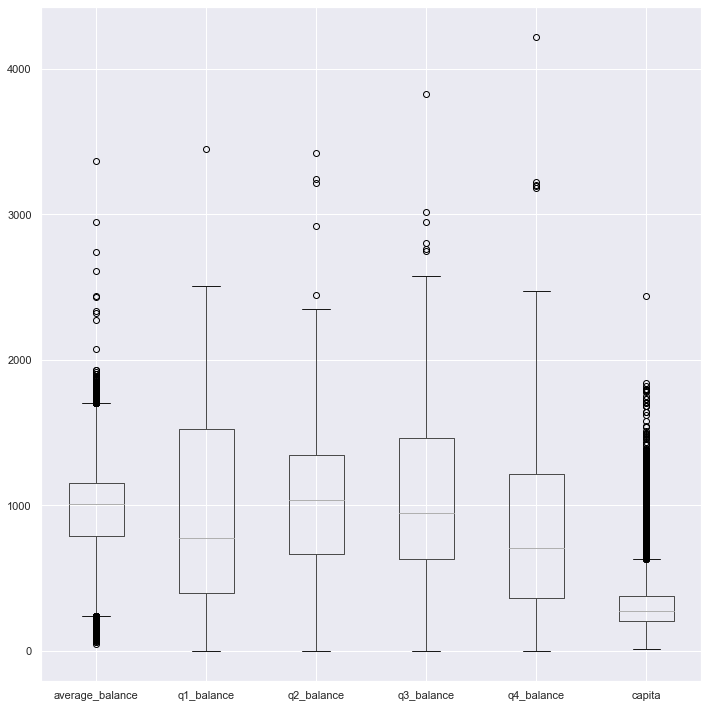

In [708]:
# We decided not to drop outliers after finding that most models were less accurate without the extra detail.

plt.figure(figsize=(10, 10))
df.boxplot()
plt.tight_layout()

In [709]:
#import scipy.stats as stats
#from scipy.stats import zscore

In [710]:
#z_scores = stats.zscore(df.select_dtypes(include=np.number))
#abs_z_scores = np.abs(z_scores)
#filtered_entries = (abs_z_scores < 3).all(axis=1)
#df = df[filtered_entries]

In [711]:
#df.reset_index(drop=True, inplace=True)

### Scaling numerical data

In [712]:
#sns.pairplot(X)

In [713]:
from sklearn.preprocessing import StandardScaler

In [714]:
# Using min-max scaler appears to make very little difference so we went for the standard scaler

scaler = StandardScaler()
scaler.fit(X)
x_scaled = scaler.transform(X)
x = pd.DataFrame(x_scaled, columns = X.columns)

In [715]:
#sns.pairplot(x)

### Getting dummies for categorical data

In [716]:
categorical = pd.get_dummies(cat, drop_first=True)

In [717]:
categorical

,reward_Cash Back,reward_Points,mailer_type_Postcard,income_level_Low,income_level_Medium,no_bank_accounts_open_2,no_bank_accounts_open_3,overdraft_protection_Yes,credit_rating_Low,credit_rating_Medium,...,no_homes_owned_3,household_size_2,household_size_3,household_size_4,household_size_5,household_size_6,household_size_8,household_size_9,own_your_home_Yes,trend_up
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,1
2,0,0,1,0,0,1,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
3,0,0,0,0,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17995,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,1
17996,1,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
17997,1,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
17998,1,0,0,0,1,0,0,0,0,1,...,0,1,0,0,0,0,0,0,1,1


### Concatenating data

In [718]:
x_full = pd.concat([x, categorical], axis=1)

## Model Candidate 1 - Logistic Regression

In [719]:
# Using this model achieves a high accuracy but only because of the imbalance in the data. 
# It has zero true positives and is therefore not a useful model to use in predictions.

In [720]:
# Importing the models and metrics we will use.

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics

In [721]:
# Splitting the data into testing and training sets.
X_train, X_test, y_train, y_test = train_test_split(x_full, y, test_size=0.3, random_state=100)

In [722]:
# Running the model.
lr = LogisticRegression(max_iter=400).fit(X_train, y_train)
y_pred =lr.predict(X_test)

In [723]:
# Checking the number of values for each class in the training data.
y_train.value_counts()

No     11862
Yes      738
Name: offer_accepted, dtype: int64

In [724]:
accuracy_score(y_pred, y_test)

0.9472222222222222

In [725]:
pd.DataFrame(classification_report(y_test, y_pred, output_dict=True))

/Applications/anaconda3/envs/da_env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/envs/da_env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/envs/da_env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

,No,Yes,accuracy,macro avg,weighted avg
precision,0.947222,0.0,0.947222,0.473611,0.897230
recall,1.000000,0.0,0.947222,0.500000,0.947222
f1-score,0.972896,0.0,0.947222,0.486448,0.921549
support,5115.000000,285.0,0.947222,5400.000000,5400.000000


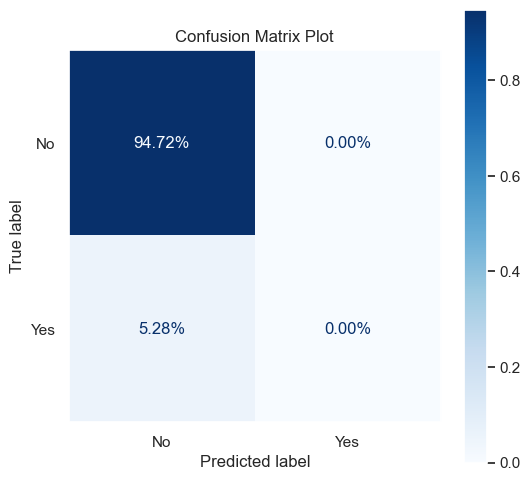

In [726]:
fig, ax = plt.subplots(figsize=(6, 6), dpi=100)
plt.title('Confusion Matrix Plot')
plt.grid(False)
plot_confusion_matrix(lr, X_test, y_test, ax=ax, normalize='all', values_format='.2%', cmap = 'Blues');

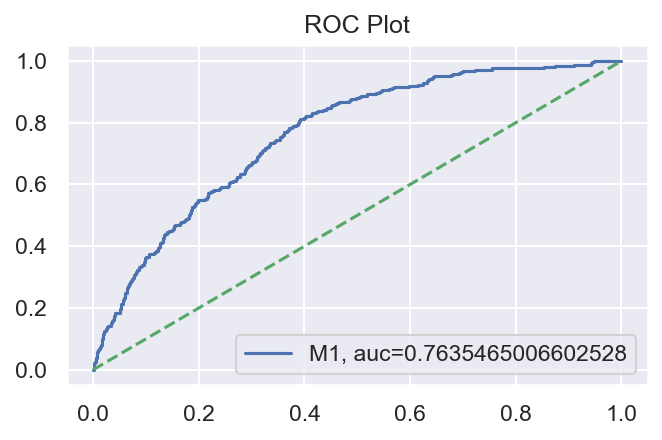

In [727]:
import sklearn.metrics as metrics
fig, ax = plt.subplots(figsize=(5, 3), dpi=150)
plt.title('ROC Plot')
y_pred_proba = lr.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba, pos_label='Yes')
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label='M1, auc='+str(auc))
plt.plot([0,1], [0,1], 'g--')
plt.legend(loc=4);

## Model Candidate 2 - Logistic Regression with Smote

In [728]:
# Here we have used SMOTE to oversample the minority class (on the training data. We could have achieved
# better results by oversampling the test data as well, but felt that this was not comparable to a 
# real world scenario.)

# This model has much lower accuracy than the first, but it is more balanced.
# Tt is predicting some true positives correctly.

In [729]:
# Importing Smote.
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [730]:
# Oversampling training data.
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

In [731]:
# Checking for balance in training data.
y_train_sm.value_counts()

Yes    11862
No     11862
Name: offer_accepted, dtype: int64

In [732]:
# Running the model.
lr = LogisticRegression(max_iter=400).fit(X_train_sm, y_train_sm)
y_pred_sm =lr.predict(X_test)

In [733]:
accuracy_score(y_test ,y_pred_sm)

0.7577777777777778

In [734]:
pd.DataFrame(classification_report(y_test, y_pred_sm, output_dict=True))

,No,Yes,accuracy,macro avg,weighted avg
precision,0.959672,0.093725,0.757778,0.526698,0.913969
recall,0.776931,0.414035,0.757778,0.595483,0.757778
f1-score,0.858686,0.152850,0.757778,0.505768,0.821434
support,5115.000000,285.000000,0.757778,5400.000000,5400.000000


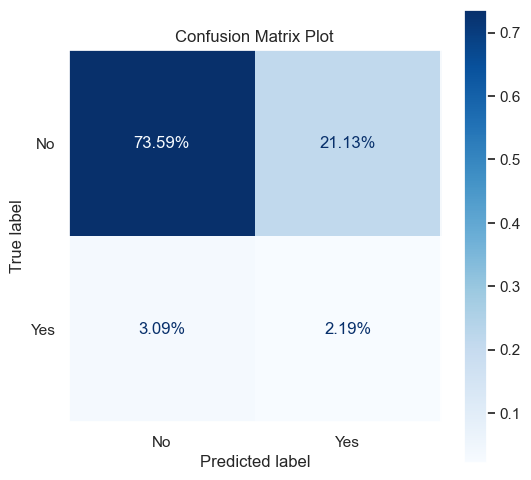

In [735]:
fig, ax = plt.subplots(figsize=(6, 6), dpi=100)
plt.title('Confusion Matrix Plot')
plt.grid(False)
plot_confusion_matrix(lr, X_test, y_test, ax=ax, normalize='all', values_format='.2%', cmap='Blues');

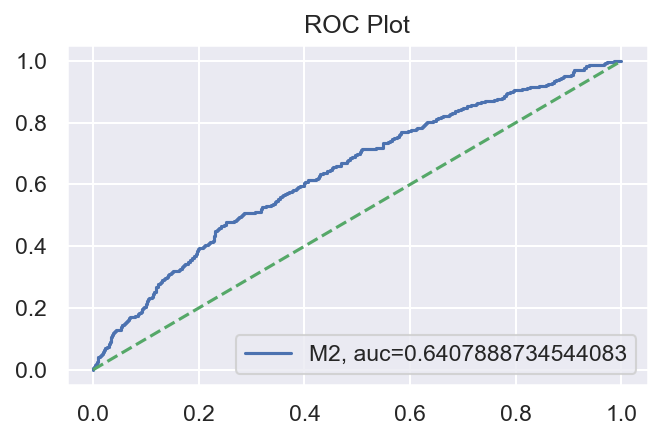

In [736]:
fig, ax = plt.subplots(figsize=(5, 3), dpi=150)
plt.title('ROC Plot')
y_pred_proba = lr.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba, pos_label='Yes')
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label='M2, auc='+str(auc))
plt.plot([0,1], [0,1], 'g--')
plt.legend(loc=4);

## Canididate Model 3 - Logistic Regression with Tomek Links

In [737]:
# Here we have used tomek links to undersample the majority class.
# This model offers no real improvement over the first.

In [738]:
# Importing Tomek Links
from imblearn.under_sampling import TomekLinks
tomek = TomekLinks(sampling_strategy='majority')

In [739]:
# Splitting data into testing and training sets
X_train, X_test, y_train, y_test = train_test_split(x_full, y, test_size=0.3, random_state=100)

In [740]:
# Undersampling the training data
X_train_tk, y_train_tk = tomek.fit_resample(X_train, y_train)

In [741]:
# Checking the balance of the training data
y_train_tk.value_counts()

No     11559
Yes      738
Name: offer_accepted, dtype: int64

In [742]:
# Running the model
lr.fit(X_train_tk, y_train_tk)
y_pred_tk = lr.predict(X_test)

In [743]:
accuracy_score(y_test, y_pred_tk)

0.9472222222222222

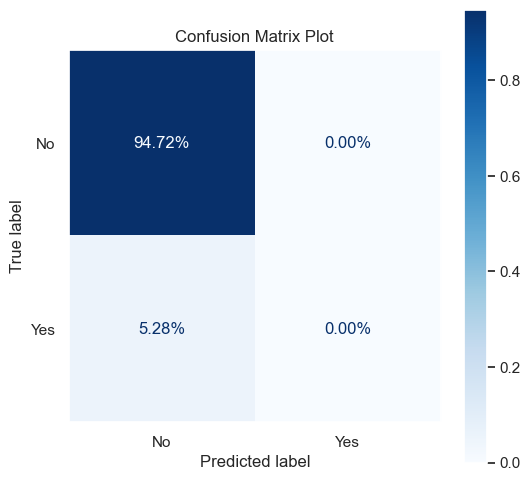

In [744]:
fig, ax = plt.subplots(figsize=(6, 6), dpi=100)
plt.title('Confusion Matrix Plot')
plt.grid(False)
plot_confusion_matrix(lr, X_test, y_test, ax=ax, normalize='all', values_format='.2%', cmap='Blues');

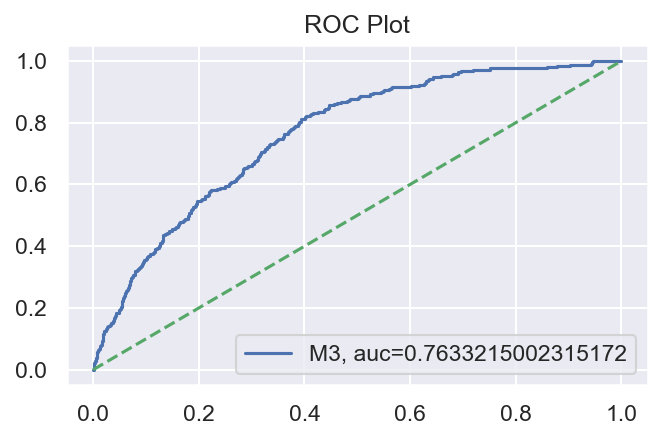

In [745]:
fig, ax = plt.subplots(figsize=(5, 3), dpi=150)
plt.title('ROC Plot')
y_pred_proba = lr.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba, pos_label='Yes')
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label='M3, auc='+str(auc))
plt.plot([0,1], [0,1], 'g--')
plt.legend(loc=4);

## Candidate Model 4 - Logistic Regression with Smote and Tomek together

In [746]:
# This model uses a combination Tomek Links and SMOTE with logistic regression to achieve a good balance
# between accuracy and true positives.

# We think that this model is best used for low cost initiatives. 
# If there is not a high cost associated with targeting customers identified with the model, 
# then we can reach the most customers who are likely to accept a credit card with this model.

In [747]:
# Splitting the data into testing and training sets
X_train, X_test, y_train, y_test = train_test_split(x_full, y, test_size=0.3, random_state=100)

In [748]:
# Undersampling the majority class the training data
X_train_tk, y_train_tk = tomek.fit_resample(X_train, y_train)

In [749]:
# Checking the balance
y_train_tk.value_counts()

No     11559
Yes      738
Name: offer_accepted, dtype: int64

In [750]:
# Oversampling the minority class on the training data
X_train_tk_sm, y_train_tk_sm = smote.fit_resample(X_train_tk, y_train_tk)

In [751]:
# Checking the balance
y_train_tk_sm.value_counts()

Yes    11559
No     11559
Name: offer_accepted, dtype: int64

In [752]:
# Running the model
lr = LogisticRegression(max_iter=400).fit(X_train_tk_sm, y_train_tk_sm)
y_pred_tk_sm = lr.predict(X_test)

In [753]:
accuracy_score(y_test, y_pred_tk_sm)

0.755

In [754]:
pd.DataFrame(classification_report(y_test, y_pred_tk_sm, output_dict=True))

,No,Yes,accuracy,macro avg,weighted avg
precision,0.960418,0.095164,0.755,0.527791,0.914752
recall,0.773216,0.428070,0.755,0.600643,0.755000
f1-score,0.856710,0.155712,0.755,0.506211,0.819713
support,5115.000000,285.000000,0.755,5400.000000,5400.000000


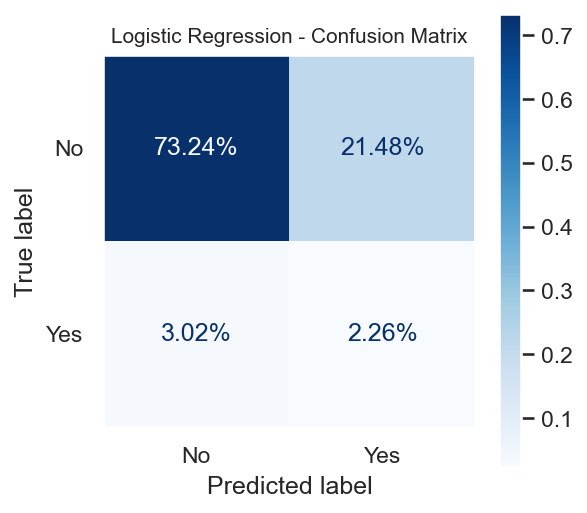

In [755]:
fig, ax = plt.subplots(figsize=(4, 4), dpi=150)
title_font = {'size':'10'}
plt.grid(False)
plt.title('Logistic Regression - Confusion Matrix', title_font)
plot_confusion_matrix(lr, X_test, y_test, ax=ax, normalize='all', values_format='.2%', cmap='Blues');

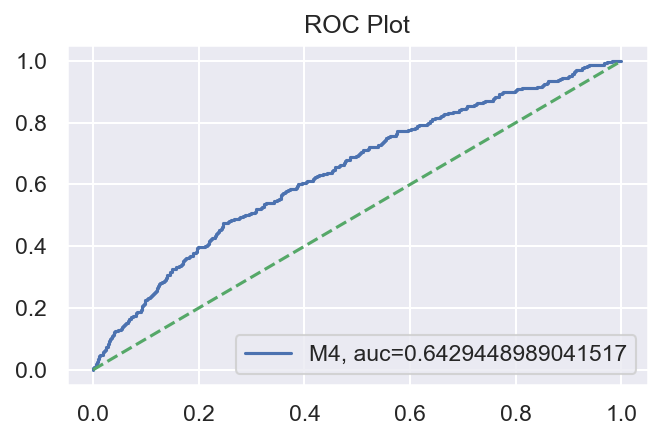

In [756]:
fig, ax = plt.subplots(figsize=(5, 3), dpi=150)
plt.title('ROC Plot')
y_pred_proba = lr.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba, pos_label='Yes')
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label='M4, auc='+str(auc))
plt.plot([0,1], [0,1], 'g--')
plt.legend(loc=4);

## Candidate Model 5 - K Nearest Neighbours with Smote + Tomek

In [757]:
# In this model we used k nearest neighbours with SMOTE and Tomek Links
# This model produces more false positives than the previous model without any increase in
# true positives.
# It is therefore not a particularly useful model.

In [758]:
# Importing the classifier
from sklearn.neighbors import KNeighborsClassifier

In [759]:
# Running the model
kn = KNeighborsClassifier(n_neighbors=5, p=3)
kn.fit(X_train_tk_sm, y_train_tk_sm)
y_pred_kn = kn.predict(X_test)

In [760]:
accuracy_score(y_test ,y_pred_kn)


0.6931481481481482

In [761]:
pd.DataFrame(classification_report(y_test, y_pred_kn, output_dict=True))

,No,Yes,accuracy,macro avg,weighted avg
precision,0.956201,0.073913,0.693148,0.515057,0.909635
recall,0.708504,0.417544,0.693148,0.563024,0.693148
f1-score,0.813925,0.125594,0.693148,0.469759,0.777596
support,5115.000000,285.000000,0.693148,5400.000000,5400.000000


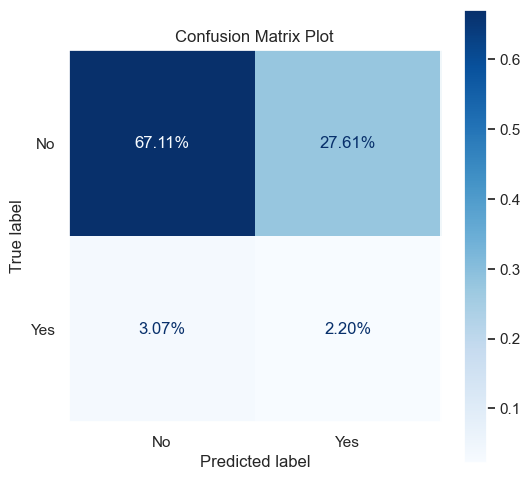

In [762]:
fig, ax = plt.subplots(figsize=(6, 6), dpi=100)
plt.title('Confusion Matrix Plot')
plt.grid(False)
plot_confusion_matrix(kn, X_test, y_test, ax=ax, normalize='all', values_format='.2%', cmap='Blues');

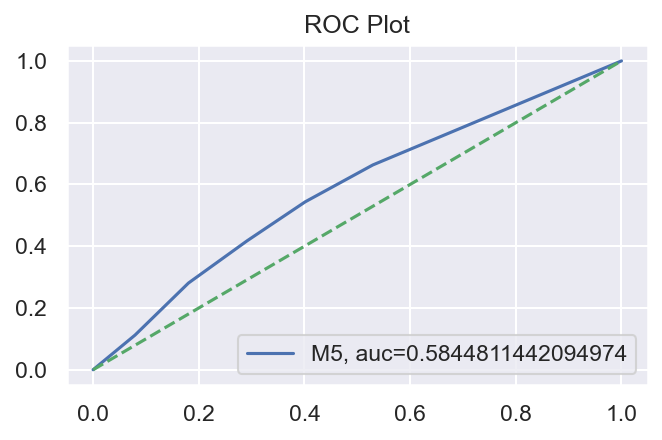

In [763]:
fig, ax = plt.subplots(figsize=(5, 3), dpi=150)
plt.title('ROC Plot')
y_pred_proba = kn.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba, pos_label='Yes')
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label='M5, auc='+str(auc))
plt.plot([0,1], [0,1], 'g--')
plt.legend(loc=4);

## Candidate Model 6 - Decision Tree with Smote and Tomek Links

In [764]:
# This model uses a Decision Tree classifier together with SMOTE and Tomek Links.
# It has fewer true positives and fewer false postitives. Though not bad, the next model is an improvement.

In [765]:
# Importing the model
from sklearn import tree

In [766]:
# Running the model
tr = tree.DecisionTreeClassifier().fit(X_train_tk_sm, y_train_tk_sm)

In [767]:
y_pred_tr = tr.predict(X_test)

In [768]:
accuracy_score(y_test ,y_pred_tr)


0.8155555555555556

In [769]:
pd.DataFrame(classification_report(y_test, y_pred_tr, output_dict=True))

,No,Yes,accuracy,macro avg,weighted avg
precision,0.952936,0.083236,0.815556,0.518086,0.907035
recall,0.847116,0.249123,0.815556,0.548120,0.815556
f1-score,0.896916,0.124780,0.815556,0.510848,0.856164
support,5115.000000,285.000000,0.815556,5400.000000,5400.000000


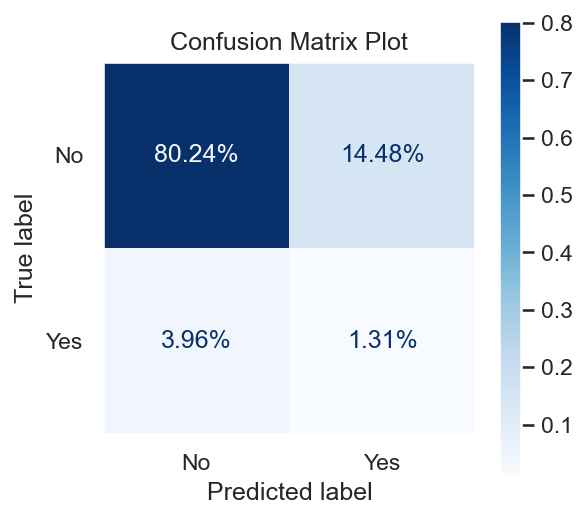

In [770]:
fig, ax = plt.subplots(figsize=(4, 4), dpi=150)
plt.title('Confusion Matrix Plot')
plt.grid(False)
plot_confusion_matrix(tr, X_test, y_test, ax=ax, normalize='all', values_format='.2%', cmap='Blues');

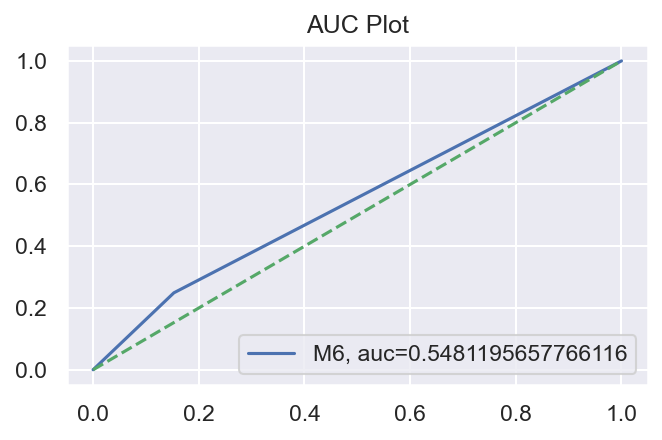

In [771]:
fig, ax = plt.subplots(figsize=(5, 3), dpi=150)
plt.title('AUC Plot')
y_pred_proba = tr.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba, pos_label='Yes')
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label='M6, auc='+str(auc))
plt.plot([0,1], [0,1], 'g--')
plt.legend(loc=4);

## Candidate Model 7 - Random Forest with SMOTE + Tomek Links

In [772]:
# This model combines Random Forest with SMOTE and Tomek Links
# It has relatively good true positive rates and low false positive rates.

# This model is therefore best for higher cost initiatives. 
# If the bank wanted to target fewer customers but still be sure to target 
# some who are likely to accept the offer, this model would be more effective.

In [773]:
# Importing the classifier
from sklearn.ensemble import RandomForestClassifier

In [774]:
# Running the model
rf=RandomForestClassifier(n_estimators=3)

rf.fit(X_train_tk_sm,y_train_tk_sm)

y_pred_rf=rf.predict(X_test)

In [775]:
accuracy_score(y_test ,y_pred_rf)

0.8527777777777777

In [776]:
pd.DataFrame(classification_report(y_test, y_pred_rf, output_dict=True))

,No,Yes,accuracy,macro avg,weighted avg
precision,0.956660,0.119403,0.852778,0.538031,0.912471
recall,0.884653,0.280702,0.852778,0.582677,0.852778
f1-score,0.919248,0.167539,0.852778,0.543394,0.879575
support,5115.000000,285.000000,0.852778,5400.000000,5400.000000


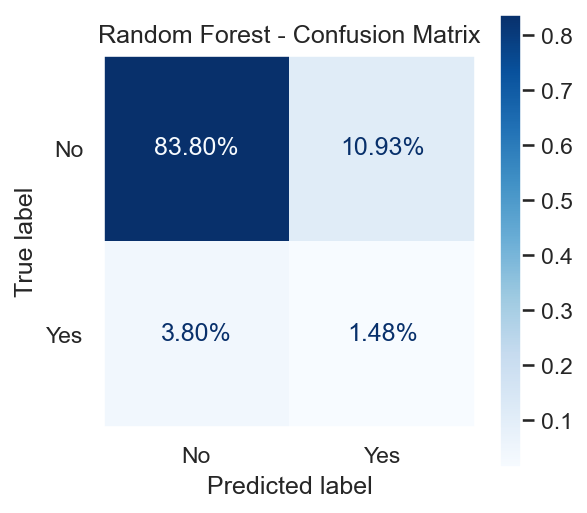

In [777]:
fig, ax = plt.subplots(figsize=(4, 4), dpi=150)
plt.grid(False)
plt.title('Random Forest - Confusion Matrix')
plot_confusion_matrix(rf, X_test, y_test, ax=ax, normalize='all', values_format='.2%', cmap='Blues');

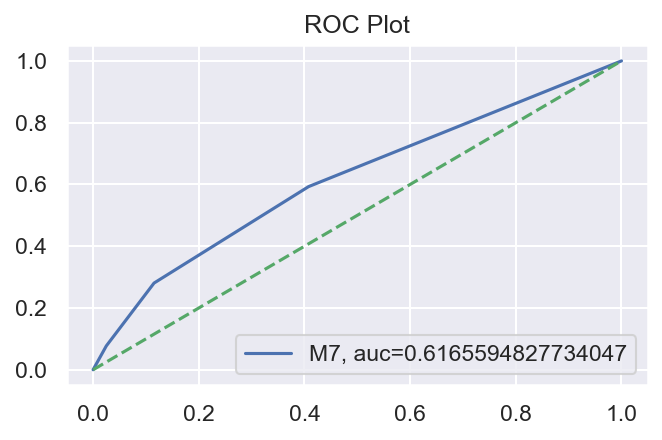

In [778]:
fig, ax = plt.subplots(figsize=(5, 3), dpi=150)
plt.title('ROC Plot')
y_pred_proba = rf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba, pos_label='Yes')
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label='M7, auc='+str(auc))
plt.plot([0,1], [0,1], 'g--')
plt.legend(loc=4);